In [22]:
import pandas as pd
#Importing the dataset
data=pd.read_csv("IEA GEVO 2023 data.csv")
#Head of the dataset
print("The head of the dataset is:\n",data.head(5),'\n')
#Instances
print("There are ",len(data.axes[0])," instances")

The head of the dataset is:
       region    category       parameter  mode powertrain  year      unit  \
0  Australia  Historical        EV sales  Cars        BEV  2011  Vehicles   
1  Australia  Historical        EV stock  Cars        BEV  2011  Vehicles   
2  Australia  Historical  EV sales share  Cars         EV  2011   percent   
3  Australia  Historical  EV stock share  Cars         EV  2011   percent   
4  Australia  Historical  EV stock share  Cars         EV  2012   percent   

      value  
0  49.00000  
1  49.00000  
2   0.00650  
3   0.00046  
4   0.00280   

There are  10079  instances


In [23]:
year_to_delete=[2010,2011,2012,2025,2030]
df=data.loc[~data['year'].isin(year_to_delete)]

#Deleting regions which are not applicable for analysis
region_to_delete=['EU27','Other Europe','Rest of the world','World']
df=df.loc[~df['region'].isin(region_to_delete)]

#Deleting parameters which are not applicable for analysis
parameter_to_delete=['EV sales share', 'EV stock share','EV stock','Oil displacement, million lge','Oil displacement Mbd','EV charging points','Electricity demand']
df=df.loc[~df['parameter'].isin(parameter_to_delete)]

#Deleting categorys which are not applicable for analysis
category_to_delete=['Projection-STEPS','Projection-APS']
df=df.loc[~df['category'].isin(category_to_delete)]
print(df)

         region    category parameter  mode powertrain  year      unit  \
10    Australia  Historical  EV sales  Cars        BEV  2013  Vehicles   
11    Australia  Historical  EV sales  Cars       PHEV  2013  Vehicles   
20    Australia  Historical  EV sales  Cars       PHEV  2014  Vehicles   
21    Australia  Historical  EV sales  Cars        BEV  2014  Vehicles   
22    Australia  Historical  EV sales  Cars        BEV  2015  Vehicles   
...         ...         ...       ...   ...        ...   ...       ...   
8902        USA  Historical  EV sales  Cars        BEV  2020  Vehicles   
8951        USA  Historical  EV sales  Cars        BEV  2021  Vehicles   
8956        USA  Historical  EV sales  Cars       PHEV  2021  Vehicles   
8959        USA  Historical  EV sales  Cars       PHEV  2022  Vehicles   
8964        USA  Historical  EV sales  Cars        BEV  2022  Vehicles   

         value  
10       190.0  
11       100.0  
20       950.0  
21       370.0  
22       760.0  
...      

In [24]:
df = df.groupby('year')['value'].sum().reset_index()
df['value'] = df['value'].astype('int64')
df

,year,value
0,2013,288113
1,2014,457678
2,2015,909904
3,2016,1121243
4,2017,1731703
5,2018,2651572
6,2019,2864301
7,2020,4529404
8,2021,9025455
9,2022,13090256


In [25]:
#pip install statsmodels --upgrade

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [27]:
from statsmodels.tsa.ar_model import AutoReg

In [28]:
ar_model = AutoReg(df['value'],lags = 1)
ar_result = ar_model.fit()

In [29]:
forecast_years = 5
forecast = ar_result.predict(start=len(df), end=len(df) + forecast_years - 1, dynamic=False)

In [30]:
forecast

10    1.994841e+07
11    3.036698e+07
12    4.619437e+07
13    7.023859e+07
14    1.067654e+08
dtype: float64

In [31]:
# Set 'year' as the index
#df.set_index('year', inplace=True)

In [32]:
# Create a date range for the forecasted years
df.index = pd.to_datetime(df.year, format='%Y')
last_year = df.index[-1].year
next_year_date = last_year + 1
next_years_range = pd.date_range(start=f"{next_year_date}-01-01", periods=forecast_years, freq='AS')

In [33]:
last_year

2022

In [34]:
next_year_date

2023

In [35]:
next_years_range

DatetimeIndex(['2023-01-01', '2024-01-01', '2025-01-01', '2026-01-01',
               '2027-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

In [36]:
# Create a DataFrame for the forecasted years
forecast_df = pd.DataFrame({'year': next_years_range, 'value': forecast})
forecast_df['value'] = forecast_df['value'].astype('int64')
#forecast_df.set_index('year', inplace=True)

In [37]:
forecast_df

,year,value
10,2023-01-01,19948406
11,2024-01-01,30366977
12,2025-01-01,46194371
13,2026-01-01,70238585
14,2027-01-01,106765401


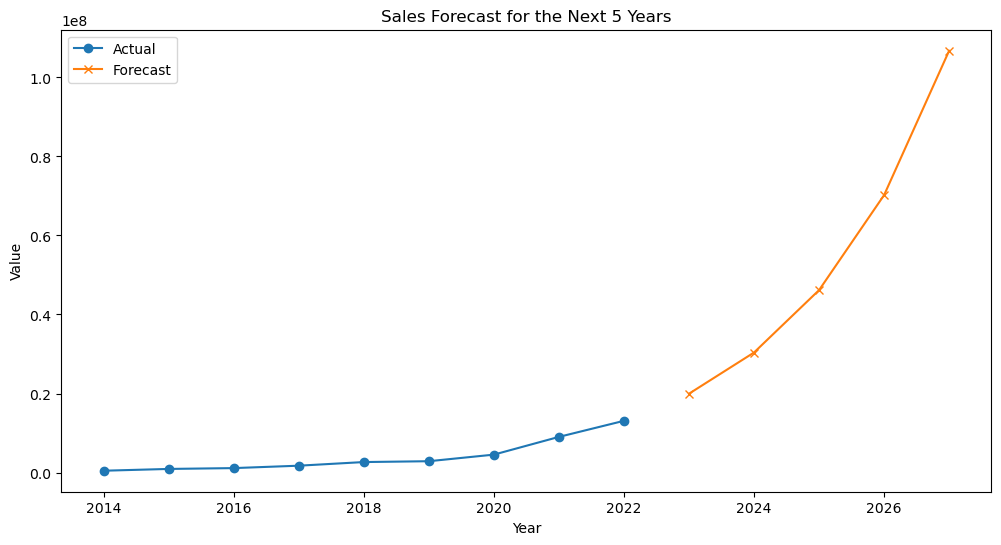

In [43]:
# Plot the actual vs. forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['value'], label='Actual', marker='o')
plt.plot(forecast_df.year, forecast_df['value'], label='Forecast', marker='x')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Sales Forecast for the Next 5 Years')
plt.legend()
plt.show()

In [40]:
result=ar_result.fittedvalues

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming you have actual sales data for the testing period in a DataFrame 'actual_df'
# 'forecast_mean' contains your forecasted values
actual_sales = df['value']  # Replace 'sales' with the actual column name

# Calculate MAE
mae = mean_absolute_error(actual_sales, result)

# Calculate MSE
mse = mean_squared_error(actual_sales, result)

# Calculate RMSE
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 522303.12
Mean Squared Error (MSE): 716868847173.59
Root Mean Squared Error (RMSE): 846681.08


In [42]:
from sklearn.metrics import r2_score
r2=r2_score(actual_sales, result)
r2

0.9560470623575854